In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [9]:
print(df.dtypes)

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object


Сразу переведем столбец "Дата" в правильный формат

In [10]:
df['Дата'] = pd.to_datetime(df['Дата'], format='%Y-%m-%d')

Сгруппируйте данные по дате, посчитайте количество продаж

In [11]:
grouped_df = df.groupby('Дата')['Количество'].sum().reset_index()
grouped_df.rename(columns={'Количество': 'Количество продаж'}, inplace=True)

Вывести несколько первых строк сгруппированных данных

In [12]:
print(grouped_df.head())

        Дата  Количество продаж
0 2018-01-04               3734
1 2018-01-05               3643
2 2018-01-06               3193
3 2018-01-07               3298
4 2018-01-09               4055


Нарисуйте график продаж у `grouped_df`

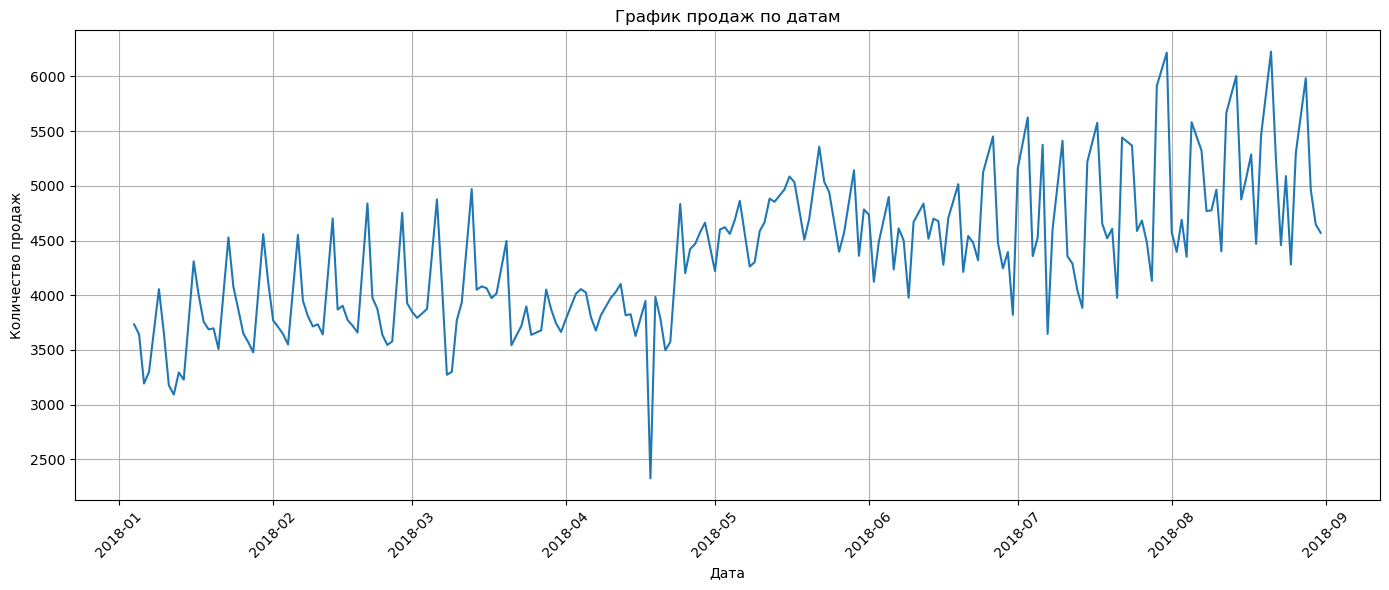

In [13]:
plt.figure(figsize=(14,6))
sns.lineplot(data=grouped_df, x='Дата', y='Количество продаж')
plt.title('График продаж по датам')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

In [ ]:
На графике прослеживается чёткий недельный цикл: регулярные пики и спады указывают на повторяющийся паттерн в 
покупательском поведении.
В начале января — высокий уровень продаж, что может быть связано с постпраздничным спросом.
В середине марта наблюдается резкий спад (возможный выброс), после чего начинается устойчивый рост.
С мая по август график показывает увеличение общего объема продаж, с характерными колебаниями.
Возможна сезонность или влияние внешних факторов (например, погоды, маркетинговых акций или праздников).

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [14]:
max_row = df[df['Количество'] == df['Количество'].max()]
print(max_row)

             Дата  Склад   Контрагент Номенклатура  Количество
218822 2018-06-28      1  address_208    product_0         200


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [15]:
df['Месяц'] = df['Дата'].dt.month
df['День_недели'] = df['Дата'].dt.dayofweek  

filtered = df[(df['Месяц'].isin([6,7,8])) & 
              (df['День_недели'] == 2) & 
              (df['Склад'] == 3)]

top_product = filtered.groupby('Номенклатура')['Количество'].sum().sort_values(ascending=False).head(1)
print(top_product)

Номенклатура
product_1    2267
Name: Количество, dtype: int64


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [39]:
import pandas as pd

In [40]:
df_weather = pd.read_csv('weather_2018.csv')

In [43]:
print(df_weather.columns.tolist())

['Местное время в Астане', 'T', 'Tn', 'Tx']


In [44]:
df_weather = df_weather[df_weather['Местное время в Астане'].notnull()]

In [45]:
df_weather['datetime'] = pd.to_datetime(df_weather['Местное время в Астане'], dayfirst=True)

In [46]:
df_weather['date'] = df_weather['datetime'].dt.date

In [47]:
daily_temp = df_weather.groupby('date')['T'].mean().reset_index()

In [48]:
daily_temp.rename(columns={'T': 'T_avg'}, inplace=True)

In [49]:
grouped_df.rename(columns={'Дата': 'date'}, inplace=True)
grouped_df['date'] = pd.to_datetime(grouped_df['date']).dt.date

In [50]:
merged_df = grouped_df.merge(daily_temp, on='date', how='inner')
print(merged_df.head())

         date  Количество продаж    T_avg
0  2018-01-04               3734 -14.0750
1  2018-01-05               3643 -16.8625
2  2018-01-06               3193 -13.3000
3  2018-01-07               3298 -12.7500
4  2018-01-09               4055  -6.2500


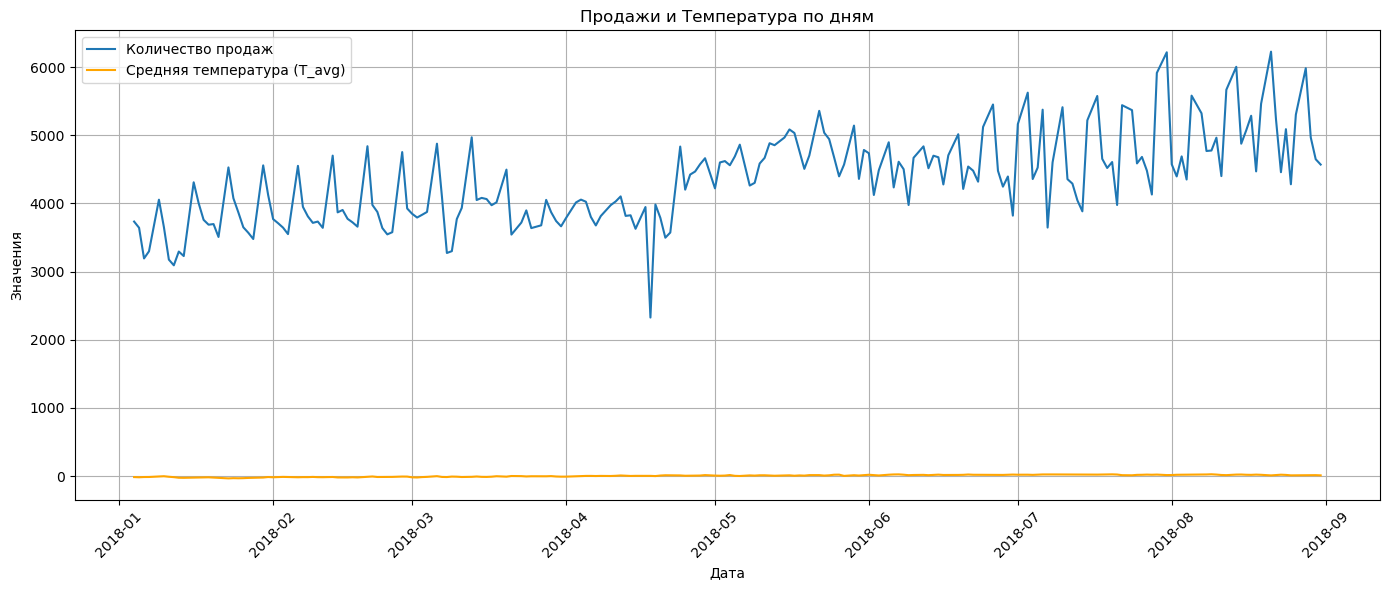

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(merged_df['date'], merged_df['Количество продаж'], label='Количество продаж')
plt.plot(merged_df['date'], merged_df['T_avg'], label='Средняя температура (T_avg)', color='orange')
plt.xlabel('Дата')
plt.ylabel('Значения')
plt.title('Продажи и Температура по дням')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

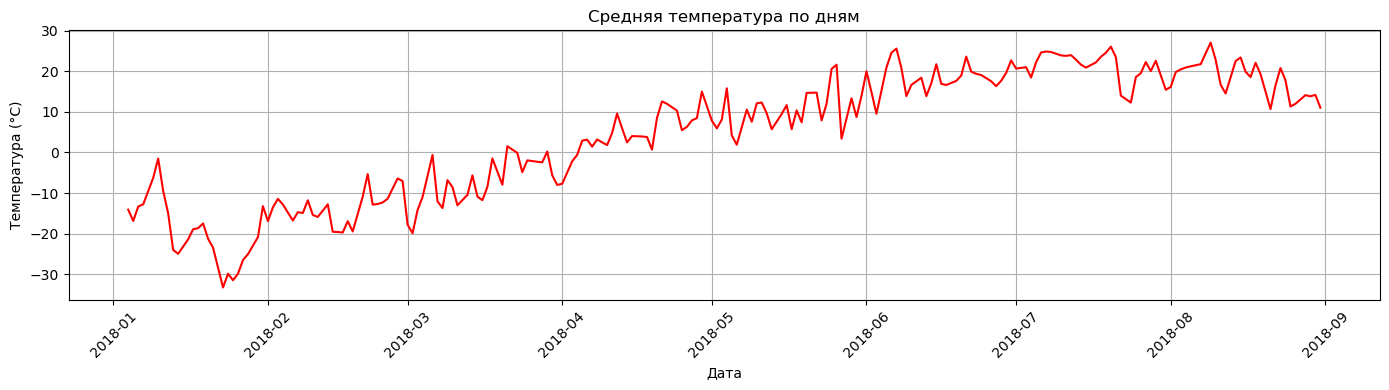

In [52]:
plt.figure(figsize=(14, 4))
plt.plot(merged_df['date'], merged_df['T_avg'], color='red', label='Температура')
plt.xlabel('Дата')
plt.ylabel('Температура (°C)')
plt.title('Средняя температура по дням')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [53]:
merged_df[['Количество продаж', 'T_avg']].corr()

,Количество продаж,T_avg
Количество продаж,1.000000,0.600219
T_avg,0.600219,1.000000


In [ ]:
#Сила связи: 0.6 — это умеренно сильная положительная связь.
#То есть: тепло на улице → люди активнее → продажи растут.